In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Define a simple range of values for x and reshape so sklearn likes it.
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - 1.

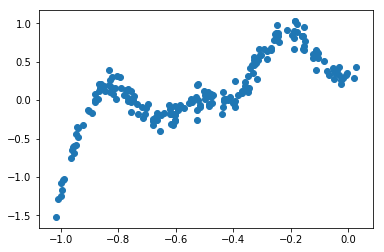

In [3]:
plt.scatter(x, y)

In [4]:
xx = np.linspace(min(x), max(x), num=200)

In [5]:
x_data = x.reshape(-1,1)
y_data = y.reshape(-1,1)

In [6]:
import mylibrary.nnlib as tnn

In [7]:
class Relu_linear_backprop(tnn.Layer):
    def __init__(self):
        tnn.layerList.append(self)
        self.x = None

    def forward(self, x):
        self.x = x
        return np.maximum(0, x)

    def backward(self, output_delta):
        return output_delta
#         return ((self.x >= 0).astype(float)) * output_delta

In [8]:
optimizer = tnn.SGD()
la1 = tnn.NonLinearLayer(1, 1, activation=Relu_linear_backprop(), optimizer=optimizer)

_______________________
epoch 0
Loss 0.9558176321457278
Weight 1 
 [[-2.14304371]]
Biases 1 
 [-0.00941646]

_______________________
epoch 10
Loss 0.8254290674242847
Weight 1 
 [[-2.07173003]]
Biases 1 
 [-0.09670969]

_______________________
epoch 20
Loss 0.7216319379510772
Weight 1 
 [[-2.00680109]]
Biases 1 
 [-0.1728026]

_______________________
epoch 30
Loss 0.6384720168464824
Weight 1 
 [[-1.9475186]]
Biases 1 
 [-0.23921754]

_______________________
epoch 40
Loss 0.5706629954041555
Weight 1 
 [[-1.89322787]]
Biases 1 
 [-0.29728626]

_______________________
epoch 50
Loss 0.514132253795042
Weight 1 
 [[-1.84335597]]
Biases 1 
 [-0.34814104]

_______________________
epoch 60
Loss 0.4662437749026611
Weight 1 
 [[-1.79739339]]
Biases 1 
 [-0.39279704]

_______________________
epoch 70
Loss 0.4265123331372447
Weight 1 
 [[-1.75491474]]
Biases 1 
 [-0.43201494]

_______________________
epoch 80
Loss 0.39233305297052085
Weight 1 
 [[-1.71554318]]
Biases 1 
 [-0.46644469]

_____________

Weight 1 
 [[-0.77360475]]
Biases 1 
 [-0.45320218]

_______________________
epoch 750
Loss 0.14040034433890752
Weight 1 
 [[-0.76458158]]
Biases 1 
 [-0.44645319]

_______________________
epoch 760
Loss 0.14022122514994786


TclError: this isn't a Tk application

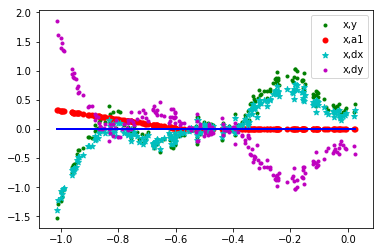

In [9]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(1000):
    a1 = la1.forward(x_data)
    loss = tnn.MseLoss.loss(a1, y_data)
    dy = tnn.MseLoss.del_loss(a1, y_data)
    
    dx = la1.backward(dy)
    
    la1.update()
    
    if step % 10 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, y, marker='.', c='g', label='x,y')
        plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
        plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
        plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
        plt.plot(x, np.zeros_like(x), c='b', lw=2)
#         plt.scatter(x, da1.reshape(-1), marker='.', c='y', lw=1, label='x,da1')
        plt.legend()
        
        fig.canvas.draw()
        
        print("Weight 1", '\n', la1.weights)
        print("Biases 1", '\n', la1.bias)
        
        plt.pause(0.01)
        print()
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

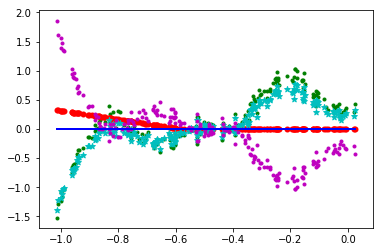

In [10]:
%matplotlib inline
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
plt.plot(x, np.zeros_like(x), c='b', lw=2)

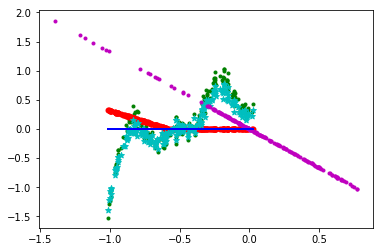

In [11]:
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
plt.plot(x, np.zeros_like(x), c='b', lw=2)
plt.scatter(dx.reshape(-1), dy.reshape(-1), marker='.', c='m', lw=1, label='dx,dy')
# here is linear relationship between dx and dy

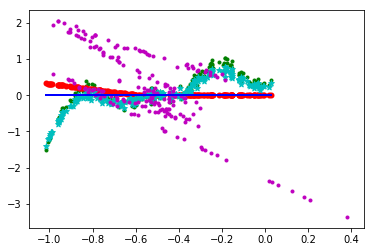

In [12]:
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
plt.plot(x, np.zeros_like(x), c='b', lw=2)
plt.scatter(x - dx.reshape(-1), y - dy.reshape(-1), marker='.', c='m', lw=1, label="x',y'")

In [13]:
la1.weights

array([[-0.75557658]])

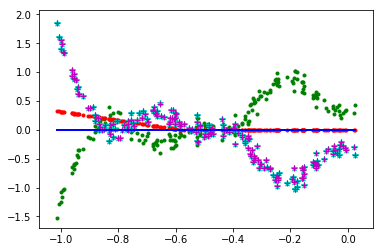

In [14]:
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=1, label='x,a1')
plt.scatter(x, dx.reshape(-1)/la1.weights[0][0], marker='*', c='c', lw=1, label='x,dx')
plt.scatter(x, dy.reshape(-1), marker='+', c='m', lw=1, label='x,dy')
plt.plot(x, np.zeros_like(x), c='b', lw=2)

In [15]:
'''
Vanishing gradient on the zeros region of relu is solved using the LinearOnly Backpropagation.
[Philosophical answer:- Brain not only optimizes the neuron that fire, but also those that doesnt.]
'''
#Lets GO

'\nVanishing gradient on the zeros region of relu is solved using the LinearOnly Backpropagation.\n[Philosophical answer:- Brain not only optimizes the neuron that fire, but also those that doesnt.]\n'

In [16]:
# forward propagating the changed x_data 

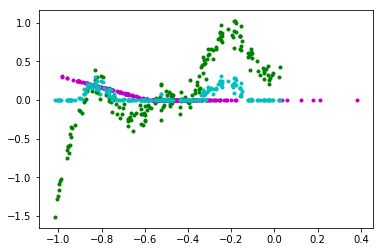

In [23]:
a1_ = la1.forward(x_data - dx)
loss_ = tnn.MseLoss.loss(a1_, y_data)
dy_ = tnn.MseLoss.del_loss(a1_, y_data)
dx_ = la1.backward(dy_)

plt.scatter(x, y, marker='.', c='g')
plt.scatter(x - dx.reshape(-1), a1_.reshape(-1), marker='.', c='m', lw=1)
plt.scatter(x, a1_.reshape(-1), marker='.', c='c', lw=1)
# plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=1)